# ЛАБОРАТОРНА РОБОТА  

## "Алгоритми та моделі перетворення даних"

__Метою__ лабораторної роботи є набуття практичних навичок використання модулів бібліотеки `Scikit-learn` для вирішення наступних задач:

- визначення та розподілення данних по їх типам
- вибір та застосування алгоритмів перетворення різноманітних типів даних
- настроювання параметрів та застосування трансформерів
- побудова конвеєра для автоматизації процесів трансформації даних

__Результатом__ виконання лабораторної роботи повинен стати датасет, в якому колонки з покажчиком перетворені під для навчання моделей

In [1]:
# імпортувати бібліотеки pandas та numpy
import pandas as pd
import numpy as np

## Завдання

Вхідним датасетом є csv-файл, отриманий в результаті виконання лабораторної роботи по конструюванню та очищеню покажчиків даних про продажі квартир рієлторської компанії.

<h4 style='background-color:cyan; color:red; padding:15px'><ul>
    <li>замість `...` вписуйте Ваш програмний код
    <li>не змінюйте імена запропонованих зміних
    </ul>
</h4>

In [138]:
# ззчитати підготовлений датасет `apartments_clean.csv` в датафрейм та проінспектувати його стан
data = pd.read_csv("apartments_clean.csv")
data.head()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,type,district,area_comfort
0,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,Петропавлівська,площа,Оболонський,10.0
1,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,Петропавлівська,вулиця,Подільський,10.0
2,82000.0,2.0,1281.0,18.0,26.0,2009.0,64.0,37.0,14.0,Дніпровська,вулиця,Оболонський,13.0
3,135000.0,2.0,2077.0,16.0,23.0,2012.0,65.0,25.0,18.0,Дніпровська,вулиця,Оболонський,22.0
4,84000.0,2.0,1273.0,6.0,26.0,2009.0,66.0,37.0,18.0,Дніпровська,вулиця,Оболонський,11.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         483 non-null    float64
 1   rooms         483 non-null    float64
 2   price_per_m2  483 non-null    float64
 3   level         483 non-null    float64
 4   levels        483 non-null    float64
 5   year          483 non-null    float64
 6   area_total    483 non-null    float64
 7   area_living   483 non-null    float64
 8   area_kitchen  483 non-null    float64
 9   street        483 non-null    object 
 10  type          483 non-null    object 
 11  district      483 non-null    object 
 12  area_comfort  483 non-null    float64
dtypes: float64(10), object(3)
memory usage: 49.2+ KB


## 1. Визначення типів покажчиків вхідного датасету

In [4]:
# відокремити від робочого датасету колонку з цільовим показчиком (`Price`) 
# та вилучити її з обробки
target = data['Price']
data.drop(columns='Price', inplace=True)
data

,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,type,district,area_comfort
0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,Петропавлівська,площа,Оболонський,10.0
1,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,Петропавлівська,вулиця,Подільський,10.0
2,2.0,1281.0,18.0,26.0,2009.0,64.0,37.0,14.0,Дніпровська,вулиця,Оболонський,13.0
3,2.0,2077.0,16.0,23.0,2012.0,65.0,25.0,18.0,Дніпровська,вулиця,Оболонський,22.0
4,2.0,1273.0,6.0,26.0,2009.0,66.0,37.0,18.0,Дніпровська,вулиця,Оболонський,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
478,2.0,998.0,1.0,5.0,2009.0,43.0,29.0,14.0,Іскрівська,вулиця,Солом'янський,0.0
479,1.0,2614.0,2.0,7.0,2019.0,44.0,14.0,21.0,Теремківська,вулиця,Голосіївський,9.0
480,1.0,1147.0,3.0,5.0,1960.0,34.0,18.0,8.0,Автозаводська,вулиця,Оболонський,8.0
481,3.0,1135.0,13.0,25.0,2004.0,69.0,37.0,14.0,Здолбунівська,вулиця,Дарницький,18.0


In [5]:
# для самоперевірки: кількисть рядків в датасетах повинна співпадати!
target.shape, data.shape

((483,), (483, 12))

In [6]:
# імпортувати з sklearn модуль, що відповідає за селективний відбір покажчиків
from sklearn.compose import make_column_selector as col_selector

In [7]:
# побудувати  селектори для вібіру числових та категоріальних колонок
numeric_selector = col_selector(dtype_include=np.number)
category_selector = col_selector(dtype_include=object)

In [8]:
# застосувати побудовані селектори для створення списків числових та категоріальних показчиків
numeric_data_columns = numeric_selector(data)
category_data_columns = category_selector(data)

print(f'список числових покажчиків = {numeric_data_columns}')
print(f'список категоріальних покажчиків = {category_data_columns}')

список числових покажчиків = ['rooms', 'price_per_m2', 'level', 'levels', 'year', 'area_total', 'area_living', 'area_kitchen', 'area_comfort']
список категоріальних покажчиків = ['street', 'type', 'district']


In [9]:
# створити 2 окремі датасети: числовий та категоріальний та вивести їх основні властивості
data_numeric = data[numeric_data_columns]
data_category = data[category_data_columns]

data_numeric.shape, data_category.shape

((483, 9), (483, 3))

In [10]:
data_numeric.describe()

,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,area_comfort
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,2.159420,2188.782402,9.474120,17.525880,1999.014493,78.768116,40.465839,15.467909,22.834369
std,1.051303,7156.389112,7.081978,8.852693,25.299980,51.387553,26.280966,8.488979,36.902269
min,1.000000,478.000000,1.000000,2.000000,1895.000000,25.000000,10.000000,3.000000,-25.000000
25%,1.000000,1168.000000,4.000000,9.000000,1994.500000,52.000000,30.000000,11.500000,9.000000
50%,2.000000,1593.000000,8.000000,18.000000,2009.000000,69.000000,37.000000,14.000000,16.000000
75%,3.000000,2077.500000,13.000000,25.000000,2014.000000,87.000000,44.000000,16.000000,26.000000
max,7.000000,157000.000000,33.000000,47.000000,2021.000000,400.000000,320.000000,78.000000,299.000000


## 2. Маштабування числових та категоріальних колонок

### 2.1. Маштабування числових показчиків

In [2]:
# з модуля `preprocessing` імпортувати нормалізатор 'MinMaxScaler' та стандартизатор 'StandardScaler'
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'sklearn'

In [12]:
# створити відповідні маштабувачі
standart_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [13]:
# побудувати змаштабовані датасети за двома стратегіями: стандартизація та нормалізація
data_numeric_std = standart_scaler.fit_transform(data_numeric)
data_numeric_min_max= min_max_scaler.fit_transform(data_numeric)

In [14]:
data_numeric_std

array([[-1.10398474, -0.15145977,  0.35703285, ..., -1.04616836,
        -1.23439604, -0.34815407],
       [-1.10398474, -0.15145977,  0.35703285, ..., -1.04616836,
        -1.23439604, -0.34815407],
       [-0.1517979 , -0.12698074,  1.20513219, ..., -0.1320131 ,
        -0.17309865, -0.26677397],
       ...,
       [-1.10398474, -0.14572468, -0.91511616, ..., -0.85571935,
        -0.88063025, -0.40240747],
       [ 0.80038894, -0.14740324,  0.49838274, ..., -0.1320131 ,
        -0.17309865, -0.13114047],
       [-0.1517979 , -0.03829672, -0.20836671, ..., -0.89380915,
         0.53443294, -0.34815407]])

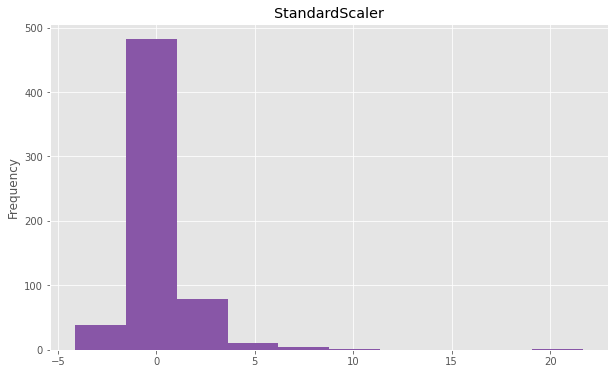

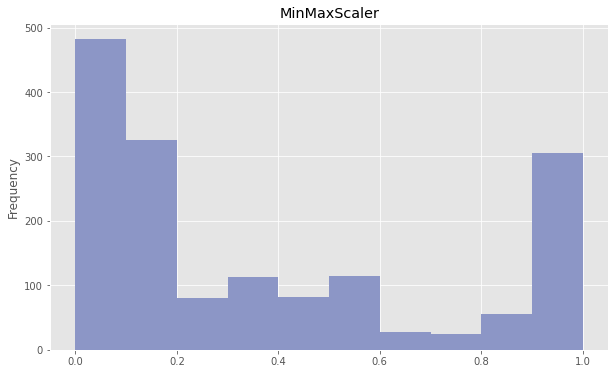

In [44]:
# побудувати графіки розподілення значень показчиків при
# стандартном та нормалізованом маштабуванні

import matplotlib.pyplot as plt
plt.style.use('ggplot')

numeric_std_df = pd.DataFrame(data_numeric_std)
numeric_min_max_df = pd.DataFrame(data_numeric_min_max)

numeric_std_df.plot(kind='hist',
                    figsize=(10, 6),
                    color='#8856a7',
                    legend=False,
                    title='StandardScaler')
numeric_min_max_df.plot(kind='hist',
                        figsize=(10, 6),
                        color='#8c96c6',
                       legend=False,
                       title='MinMaxScaler')
plt.show()

#####  __проаналізувати графіки та визначись який маштабувач краще підходить до числовї підмножини робочого датасету__

#### <font color='#8c6bb1'>Оскільки наші дані не мають очевидних нижніх та верхніх меж для них краще використати метод маштабування StandardScaler. </font>

### 2.2. Маштабування категоріальних показчиків

In [45]:
# з модуля `preporcessing` імпортувати кодувальники 'OrdinalEncoder' та 'OneHotEncoder'
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [62]:
# проаналізувати категоріальні показчики та визначитись до якого показчика
# який енкодер доцільно застосовувати
print(data_category.nunique())
data_category['type'].unique()

street      164
type          7
district     24
dtype: int64


array(['площа', 'вулиця', 'провулок', 'проспект', 'бульвар', 'дорога',
       'узвіз'], dtype=object)

In [106]:
# створити енкодери та закодувати ними відповідні категоріальні колонки
ordinal_encoder = OrdinalEncoder()
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

for cat in data_category.columns:
    print(cat.upper())
    encoded = ordinal_encoder.fit_transform(data_category[[cat]])
    codes_df = pd.DataFrame({'Value':ordinal_encoder.categories_[0], 'Code': list(range(1, len(ordinal_encoder.categories_[0])+1))})
    print(codes_df.head(10))
    if codes_df.shape[0] > 10:
        print(codes_df.tail(10))

STREET
             Value  Code
0     Інститутська     1
1       Іскрівська     2
2    Автозаводська     3
3  Азербайджанська     4
4       Антоновича     5
5   Багговутівська     6
6      Балтійський     7
7          Басейна     8
8      Бережанська     9
9         Березова    10
             Value  Code
154     Ушинського   155
155       Хрещатик   156
156     Центральна   157
157   Чоколівський   158
158       Шевченка   159
159     Шовковична   160
160      Шолуденка   161
161     Щекавицька   162
162        Юнацька   163
163  Ясинуватський   164
TYPE
      Value  Code
0   бульвар     1
1    вулиця     2
2    дорога     3
3     площа     4
4  провулок     5
5  проспект     6
6     узвіз     7
DISTRICT
                                       Value  Code
0                              Голосіївський     1
1                  Голосіївський, Печерський     2
2  Голосіївський, Печерський, Шевченківський     3
3              Голосіївський, Шевченківський     4
4  Голосіївський, Шевченківськ

#### <font color='#8c6bb1'>Як бачимо на усіх колонках окрім district такий encoder працює не дуже ефективно, тому можемо спробувати використати його на категорії районів. А інші категорії закодуємо через OneHotEncoder. </font>

In [129]:
district_encoded = ordinal_encoder.fit_transform(data_category[['district']])
type_encoded = one_hot_encoder.fit_transform(data_category[['type']])
street_encoded = one_hot_encoder.fit_transform(data_category[['street']])

print(type_encoded.shape)
print(street_encoded.shape)

(483, 7)
(483, 164)


## 3. Побудова трансформера для підготовки даних

In [130]:
# з модуля `compose` імпортувати трансформер колонок `ColumnTransformer`
from sklearn.compose import ColumnTransformer

In [145]:
# побудувати трансформер для предобробки числових та категоріальних показчиків
# робочого датасету
numeric_preprocessor = StandardScaler()
category_ordinal_preprocessor = OrdinalEncoder()
category_one_hot_preprocessor = OneHotEncoder(handle_unknown='ignore')

transformer = ColumnTransformer([
    ('numeric_encoder', numeric_preprocessor, numeric_data_columns),
    ('category_ord_scaler', category_ordinal_preprocessor, ['district']),
    ('category_ohe_scaler', category_one_hot_preprocessor, ['type', 'street'])
])
print(transformer)

ColumnTransformer(transformers=[('numeric_encoder', StandardScaler(),
                                 ['rooms', 'price_per_m2', 'level', 'levels',
                                  'year', 'area_total', 'area_living',
                                  'area_kitchen', 'area_comfort']),
                                ('category_ord_scaler', OrdinalEncoder(),
                                 ['district']),
                                ('category_ohe_scaler',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['type', 'street'])])


In [146]:
# отримати вихідний масив застосував трансфомер до вхідного датасуту
data_transformed = transformer.fit_transform(data)
data_transformed.shape

(483, 181)

In [148]:
data_transformed = pd.DataFrame(data_transformed.toarray())

In [149]:
# побудувати вихідний датафрейм з вихідного масиву додавши в першу колонку
# ціловий показчик `target`
apartment_transformed = pd.concat([target, data_transformed], axis=1)
apartment_transformed

,Price,0,1,2,3,4,5,6,7,8,...,171,172,173,174,175,176,177,178,179,180
0,30970.0,-1.103985,-0.151460,0.357033,-0.511773,0.553360,-0.988970,-1.046168,-1.234396,-0.348154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30970.0,-1.103985,-0.151460,0.357033,-0.511773,0.553360,-0.988970,-1.046168,-1.234396,-0.348154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,82000.0,-0.151798,-0.126981,1.205132,0.958229,0.395094,-0.287685,-0.132013,-0.173099,-0.266774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,-0.151798,-0.015636,0.922432,0.618998,0.513794,-0.268205,-0.589091,0.298589,-0.022634,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,84000.0,-0.151798,-0.128100,-0.491066,0.958229,0.395094,-0.248725,-0.132013,0.298589,-0.321027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,42900.0,-0.151798,-0.166567,-1.197816,-1.416390,0.395094,-0.696768,-0.436732,-0.173099,-0.619421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
479,115000.0,-1.103985,0.059480,-1.056466,-1.190236,0.790761,-0.677288,-1.008079,0.652355,-0.375281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
480,39000.0,-1.103985,-0.145725,-0.915116,-1.416390,-1.543675,-0.872089,-0.855719,-0.880630,-0.402407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
481,115000.0,0.800389,-0.147403,0.498383,0.845152,0.197260,-0.190284,-0.132013,-0.173099,-0.131140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
# Проінспектувати вихідний датасет `apartment_transformed`
print(apartment_transformed.shape)
apartment_transformed.describe()

(483, 182)


,Price,0,1,2,3,4,5,6,7,8,...,171,172,173,174,175,176,177,178,179,180
count,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,...,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,2.198224e+05,1.323993e-16,-3.677757e-17,-1.176882e-16,-1.176882e-16,-2.206654e-15,7.355515e-18,5.148860e-17,-1.066550e-16,-3.677757e-18,...,0.008282,0.002070,0.012422,0.002070,0.020704,0.004141,0.002070,0.008282,0.016563,0.004141
std,7.983972e+05,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,...,0.090720,0.045502,0.110876,0.045502,0.142539,0.064282,0.045502,0.090720,0.127760,0.064282
min,3.097000e+04,-1.103985e+00,-2.393045e-01,-1.197816e+00,-1.755621e+00,-4.115511e+00,-1.047411e+00,-1.160438e+00,-1.470240e+00,-1.297589e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.650000e+04,-1.103985e+00,-1.427872e-01,-7.737663e-01,-9.640817e-01,-1.786236e-01,-5.214467e-01,-3.986417e-01,-4.679035e-01,-3.752808e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000e+05,-1.517979e-01,-8.333813e-02,-2.083667e-01,5.361212e-02,3.950936e-01,-1.902843e-01,-1.320131e-01,-1.730987e-01,-1.853939e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.600000e+05,8.003889e-01,-1.556620e-02,4.983827e-01,8.451518e-01,5.929271e-01,1.603583e-01,1.346155e-01,6.274521e-02,8.587314e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.570000e+07,4.609136e+00,2.165502e+01,3.325381e+00,3.332848e+00,8.698940e-01,6.257643e+00,1.064740e+01,7.373905e+00,7.491462e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [153]:
# зберегти підготовлений датасет в csv-файлі `apartment_transformed.csv`
apartment_transformed.to_csv('apartment_transformed.csv', index=False)